In [1]:
# !pip install pyteomics

%load_ext autoreload
%autoreload 2

import pandas as pd
from pyteomics import mzml
from bokeh.io import output_notebook, show, export_png
import matplotlib.pyplot as plt

output_notebook()

# set global plotting backend for pandas
pd.options.plotting.backend = "ms_matplotlib" # one of: "ms_bokeh" "ms_matplotlib" "ms_plotly"
pd.set_option('display.width',500)

Loading BokehJS ...

In [2]:
# # Download test file
# import requests

# url = 'https://raw.githubusercontent.com/levitsky/pyteomics/master/tests/test.mzML'
# file_name = 'test.mzML'

# # Send a GET request to the URL
# response = requests.get(url)

# # Save the content of the response to a file
# with open(file_name, 'wb') as file:
#     file.write(response.content)

# print(f'File {file_name} downloaded successfully!')


In [3]:
input_file = "./test.mzML"

ms_level, rt, mz, intens = [], [], [], []
with mzml.MzML(input_file, decode_binary=False) as reader:
    for scan in reader:
        ms_level.append(scan['ms level'])
        rt.append(scan['scanList']['scan'][0]['scan start time'])
        mz.append(scan['m/z array'].decode())
        intens.append(scan['intensity array'].decode())
df = pd.DataFrame({'ms_level':ms_level, 'rt':rt, 'mz':mz, 'int':intens})
# Explode mzarray and intarray columns to make the DataFrame long
df = df.explode(['mz', 'int'])
df.head()

,ms_level,rt,mz,int
0,1,0.004935,200.000188,0.0
0,1,0.004935,200.00043,0.0
0,1,0.004935,200.000673,0.0
0,1,0.004935,200.000915,0.0
0,1,0.004935,202.605829,0.0


/home/singjc/Documents/github/pyopenms_viz/pyopenms_viz/_core.py:931: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.fillna(0)


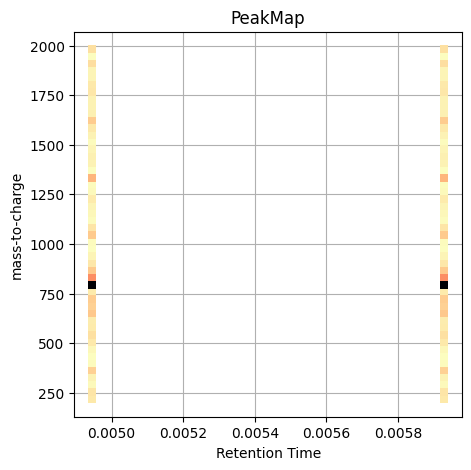

In [4]:
df.plot(kind="peakmap", x="rt", y="mz", z="int")

/home/singjc/Documents/github/pyopenms_viz/pyopenms_viz/_core.py:730: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.fillna(0)


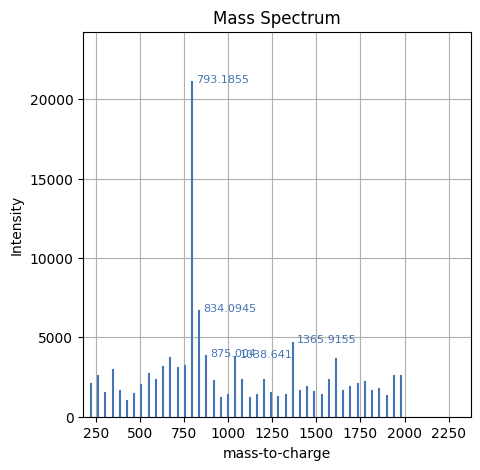

In [5]:
df.plot(kind="spectrum", x="mz", y="int")